# Equipe 3: Match Prophet

## Checkpoint 2: Análise exploratória dos Dados

## Libs Usadas



In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Leitura e Limpeza dos Dados

In [24]:
dataset_path = './dataset/Challenger_Ranked_Games.csv'

In [25]:
raw_matches = pd.read_csv(dataset_path, index_col='gameId')

In [26]:
raw_matches.head()

,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
gameId,,,,,,,,,,,,,,,,,,,,,
4247263043,1323,0,1,0,0,0,0,0,0,0,...,68,73016,49832,533,64,12.8,138,8,38711,60463
4247155821,1317,1,0,0,0,1,0,2,0,4,...,8,44218,37136,571,59,11.8,134,3,24829,14105
4243963257,932,0,0,0,0,0,0,0,0,0,...,20,30797,35364,400,50,10.0,89,5,12589,45201
4241678498,2098,0,0,0,1,1,0,1,1,2,...,72,125866,70528,832,84,16.8,205,9,65312,88202
4241538868,2344,1,1,1,1,1,1,2,2,11,...,83,131536,74596,794,85,17.0,227,7,86431,64141


### Verificação de Tipos e Dados Faltantes

In [27]:
raw_matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26904 entries, 4247263043 to 4100240254
Data columns (total 49 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gameDuraton              26904 non-null  int64  
 1   blueWins                 26904 non-null  int64  
 2   blueFirstBlood           26904 non-null  int64  
 3   blueFirstTower           26904 non-null  int64  
 4   blueFirstBaron           26904 non-null  int64  
 5   blueFirstDragon          26904 non-null  int64  
 6   blueFirstInhibitor       26904 non-null  int64  
 7   blueDragonKills          26904 non-null  int64  
 8   blueBaronKills           26904 non-null  int64  
 9   blueTowerKills           26904 non-null  int64  
 10  blueInhibitorKills       26904 non-null  int64  
 11  blueWardPlaced           26904 non-null  int64  
 12  blueWardkills            26904 non-null  int64  
 13  blueKills                26904 non-null  int64  
 14  blueDeat

In [28]:
raw_matches.isna().sum()

gameDuraton                0
blueWins                   0
blueFirstBlood             0
blueFirstTower             0
blueFirstBaron             0
blueFirstDragon            0
blueFirstInhibitor         0
blueDragonKills            0
blueBaronKills             0
blueTowerKills             0
blueInhibitorKills         0
blueWardPlaced             0
blueWardkills              0
blueKills                  0
blueDeath                  0
blueAssist                 0
blueChampionDamageDealt    0
blueTotalGold              0
blueTotalMinionKills       0
blueTotalLevel             0
blueAvgLevel               0
blueJungleMinionKills      0
blueKillingSpree           0
blueTotalHeal              0
blueObjectDamageDealt      0
redWins                    0
redFirstBlood              0
redFirstTower              0
redFirstBaron              0
redFirstDragon             0
redFirstInhibitor          0
redDragonKills             0
redBaronKills              0
redTowerKills              0
redInhibitorKi

#### Métricas Gerais do Dataframe

In [29]:
raw_matches.describe()

,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
count,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,...,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000
mean,1448.653657,0.500074,0.503531,0.525610,0.244090,0.406334,0.367120,1.389719,0.307018,4.397562,...,39.800736,69528.259441,48207.976398,526.337682,65.213165,13.042633,130.468704,5.541704,25505.503085,37648.115336
std,422.577288,0.500009,0.499997,0.499353,0.429554,0.491157,0.482029,1.247393,0.537140,3.327761,...,27.722135,35866.105905,15627.093121,178.994313,14.105689,2.821138,64.618529,3.494662,15330.689295,26509.187910
min,190.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,3340.000000,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1152.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,20.000000,43068.250000,37127.250000,412.000000,56.000000,11.200000,91.000000,3.000000,14499.750000,14454.000000
50%,1435.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,...,35.000000,64655.000000,48037.000000,541.000000,66.000000,13.200000,132.000000,5.000000,22377.000000,33385.000000
75%,1738.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,7.000000,...,53.000000,89811.750000,58719.250000,648.000000,75.000000,15.000000,174.000000,7.000000,33217.250000,57690.000000
max,3301.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,4.000000,11.000000,...,229.000000,359184.000000,135299.000000,1443.000000,132.000000,26.400000,432.000000,29.000000,188603.000000,152319.000000


#### Remoção de impurezas do Dataframe

In [30]:
matches = raw_matches.drop(['redWins', 'redFirstBlood', 'redFirstTower','redFirstBaron', 'redFirstDragon', 'redFirstInhibitor'], axis=1)

In [31]:
matches = matches.drop(matches[matches.blueAvgLevel > 18].index)
matches = matches.drop(matches[matches.redAvgLevel > 18].index)

In [32]:
matches.head()

,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
gameId,,,,,,,,,,,,,,,,,,,,,
4247263043,1323,0,1,0,0,0,0,0,0,0,...,68,73016,49832,533,64,12.8,138,8,38711,60463
4247155821,1317,1,0,0,0,1,0,2,0,4,...,8,44218,37136,571,59,11.8,134,3,24829,14105
4243963257,932,0,0,0,0,0,0,0,0,0,...,20,30797,35364,400,50,10.0,89,5,12589,45201
4241678498,2098,0,0,0,1,1,0,1,1,2,...,72,125866,70528,832,84,16.8,205,9,65312,88202
4241538868,2344,1,1,1,1,1,1,2,2,11,...,83,131536,74596,794,85,17.0,227,7,86431,64141


## Exploration

### Matriz de Correlação dos Dados

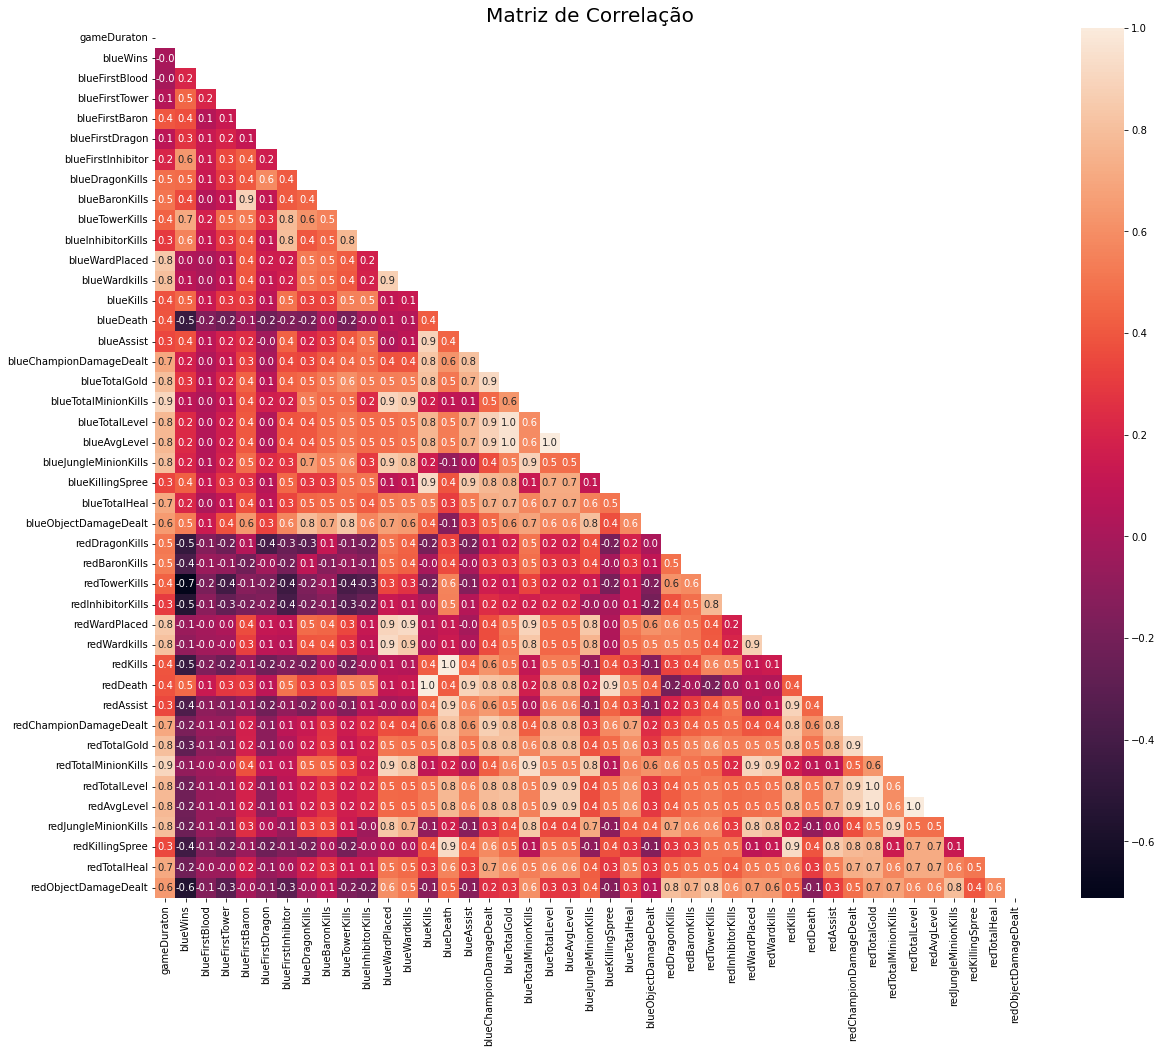

In [33]:
plt.figure(figsize=(20,16))
corr_matrix = matches.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.title('Matriz de Correlação', size=20)
sns.heatmap(corr_matrix, mask=mask, square=True, annot=True, fmt='.1f');

### Total de Ouro ao Longo da Partida

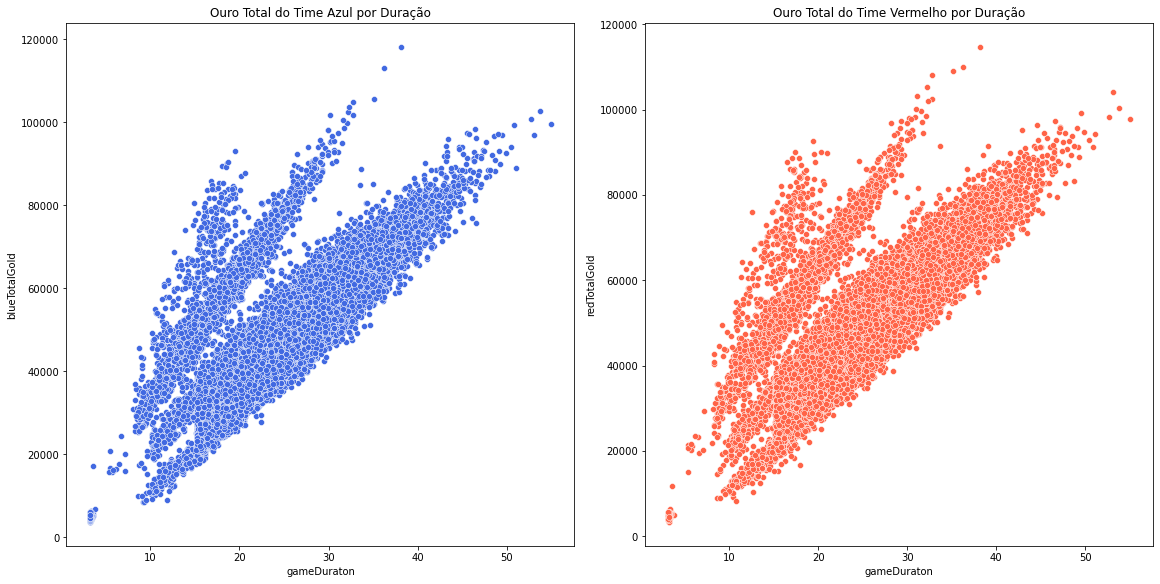

In [34]:
game_duration = matches.gameDuraton / 60

fig, axes = plt.subplots(1, 2, figsize=(16, 8),constrained_layout=True)

blue_gold = matches.blueTotalGold
axes[0].set_title('Ouro Total do Time Azul por Duração')
sns.scatterplot(x=game_duration, y=blue_gold, ax=axes[0], color='royalblue');
red_gold = matches.redTotalGold
axes[1].set_title('Ouro Total do Time Vermelho por Duração')
sns.scatterplot(x=game_duration, y=red_gold, ax=axes[1], color='tomato');

Aqui podemos ver uma tendência que engloba 3 casos distintos representados por 3 crescimentos lineares diferentes, cada um com uma inclinação. Aquela com uma maior inclinação representa os jogos cujo Ouro conseguido pela equipe é adquirido de forma rápida, ou seja, com pouco tempo de jogo; vale lembrar que o tempo de jogo representa o tempo final do jogo, portanto ele termina mais cedo quanto mais Ouro é adquirido o quanto antes. 

Isso é algo esperado, visto que esse Ouro quantifica uma das condições de vitória para uma equipe. Percebemos também, pela análise dos outros crescimentos, que jogos com maiores tempos finais de jogo demoram mais para adquirir Ouro, ou seja, por não conseguirem tanto Ouro no começo da partida, elas tendem a demorar mais.

### Distribuição do Ouro

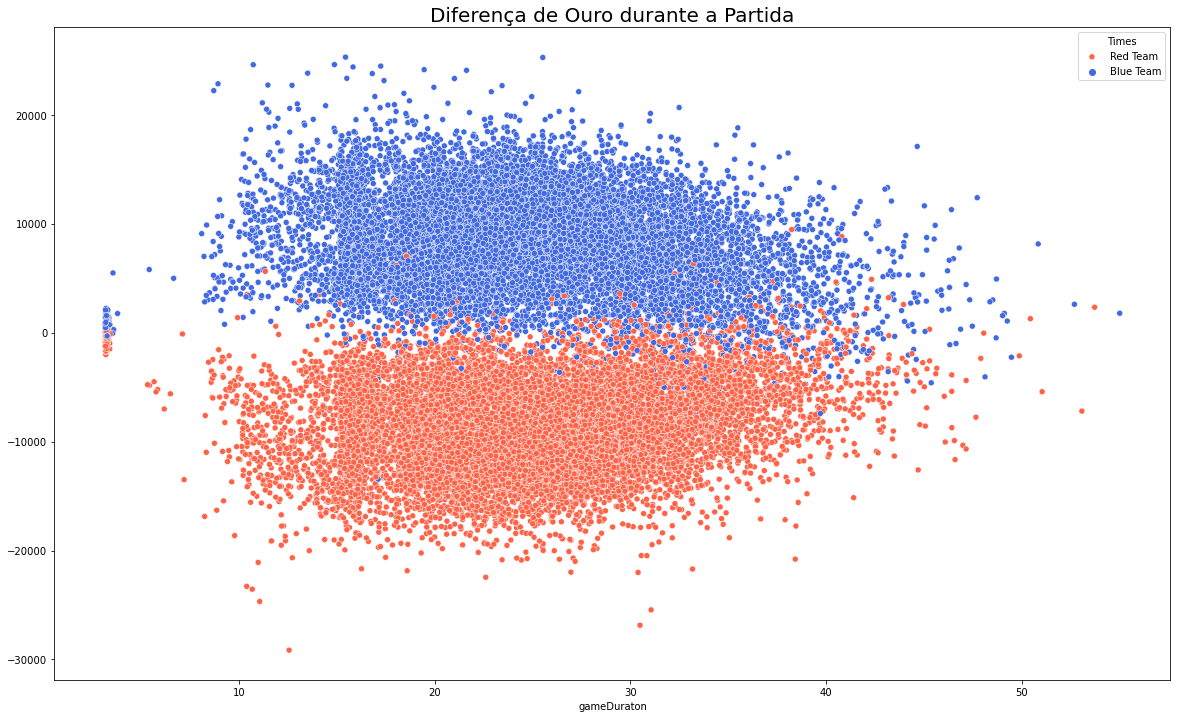

In [35]:
diff_gold = matches.blueTotalGold - matches.redTotalGold
plt.figure(figsize=(20,12))
plt.title('Diferença de Ouro durante a Partida', size=20)
sns.scatterplot(data=matches, x=game_duration, y=diff_gold, hue='blueWins', hue_order=[1, 0], palette=['royalblue', 'tomato']);
plt.legend(title="Times", labels=["Red Team", "Blue Team"]);

Se fixarmos nossa análise em uma Diferença de Ouro, podemos ver que tal característica se encontra na maioria dos intervalos de Duração de Jogo, ou seja, para uma determinada Duração de Jogo, não é óbvio ou até possível saber facilmente qual a Diferença de Ouro. Entretanto, temos também que o intervalo de Diferença de Ouro possível não é tão grande: Para uma determinada Duração de Jogo, as possibilidades de diferença de Ouro tendem a um intervalo não muito grande. 

Podemos ter uma noção relativamente confiável de probabilidades de jogos não terem determinada Diferença de Ouro.

Para esta análise, façamos uma análise de cada eixo. Fixemos um valor para

*   **Diferença de Ouro**: Vemos aqui que, para uma determinada Diferença de Ouro, as possibilidades de  Duração de Jogo são vastas, cobrindo a maioria dos tempos de jogo que vão de 10 a 40 minutos. Com isso, sabemos que a Diferença de Ouro não nos permite afirmar com segurança qual a Duração de Jogo correspondente, apesar de nos proporcionar um intervalo de possibilidades como o explicitado anteriormente.

*   **Duração de Jogo**: De forma análoga, para uma determinada Duração de Jogo, temos aqui que uma ampla gama de possibilidades para Diferença de Ouro da partida, sendo o intervalo mais consistente o de 0 até 20.000 (consideremos os valores de Diferença de Ouro como módulo, pois o sinal representa a qual time pertence a vantagem).

*Mas porque isso é importante? Não é algo muito geral?*

De fato, pode ser que seja algo a se esperar: jogos podem ter todo tipo de acontecimento, como demorar e ter muito ouro ou ser rápido e ter pouco ouro. Porém, através deste gráfico, confirmamos bons intervalos para os casos mais gerais e verificamos que estamos trabalhando com dados com tendências reais.


### Análise do Controle de Visão dos Times

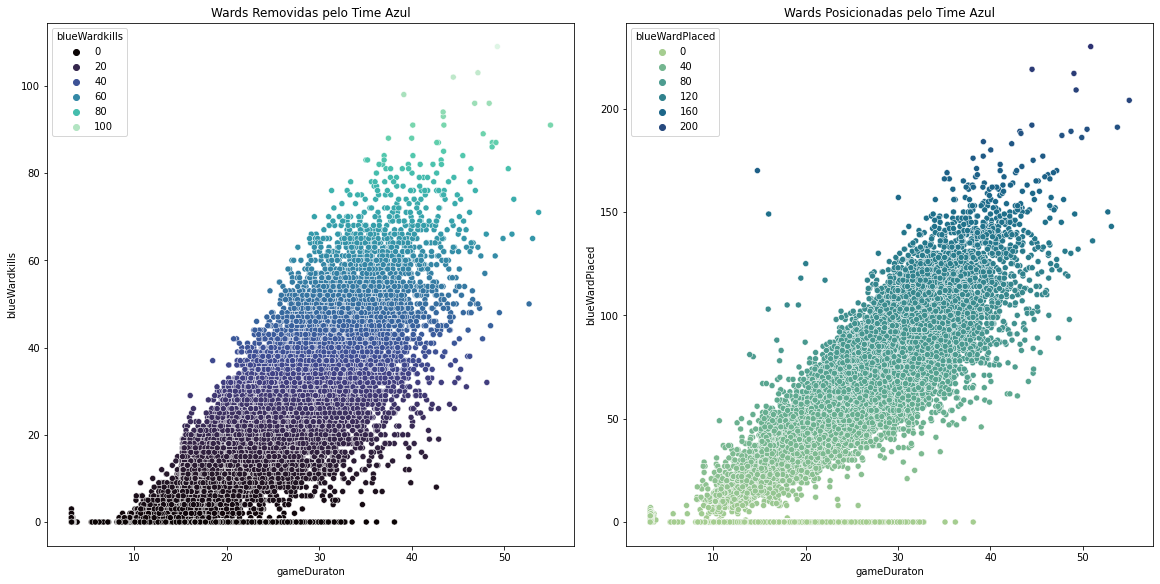

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8),constrained_layout=True)

wards_placed = matches.blueWardPlaced
wards_killed = matches.blueWardkills
sns.scatterplot(x=game_duration, y=wards_killed, ax=axes[0], palette="mako", hue=wards_killed);
sns.scatterplot(x=game_duration, y=wards_placed, ax=axes[1], palette="crest", hue=wards_placed);
axes[0].set_title('Wards Removidas pelo Time Azul')
axes[1].set_title('Wards Posicionadas pelo Time Azul');

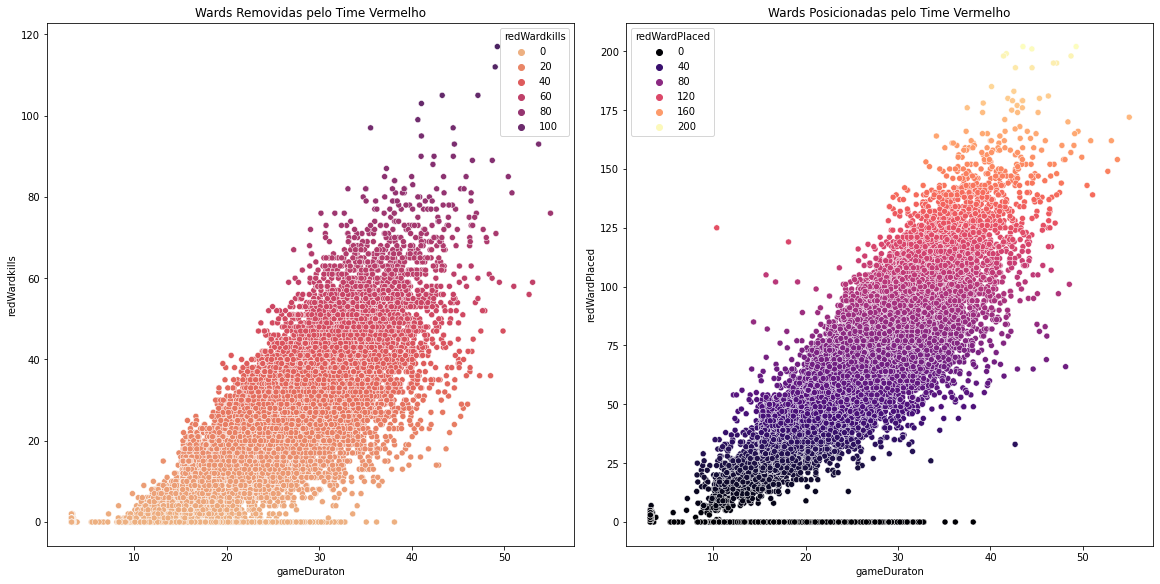

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8),constrained_layout=True)

wards_placed = matches.redWardPlaced
wards_killed = matches.redWardkills
sns.scatterplot(x=game_duration, y=wards_killed, ax=axes[0], palette="flare", hue=wards_killed);
sns.scatterplot(x=game_duration, y=wards_placed, ax=axes[1], palette="magma", hue=wards_placed);
axes[0].set_title('Wards Removidas pelo Time Vermelho')
axes[1].set_title('Wards Posicionadas pelo Time Vermelho');

A partir destes gráficos, podemos ver que há uma diferença clara entre as tendências do time Azul para o time Vermelho. Este tende a colocar mais Sentinelas em jogos mais curtos, aquele tende a fazer o mesmo em jogos mais demorados.

*Mas porque isso é interessante?*

Bom, isso implica que quando times entrar no jogo como o lado Vermelho eles procuram tem um controle de visão mais forte no começo do jogo e acabam deixando isso cair conforme a duração da partida. Já o interesse do lado azul em controlar visão aumenta com o tempo.

Isso conta um pouco sobre como os jogadores se comportam diferentemente quando estão nos diferentes lados do mapa. Como ele é assimétrico (no sentido de que não é possível espelhar uma de suas metades e obter o mapa original) os jogadores que acabam no time Vermelho parecem precisar se preocupar mais em ter informações sobre os inimigos no começo da partida, já o time azul parece precisar disso mais para o final dela.

### Contagem da Distribuição das Kills

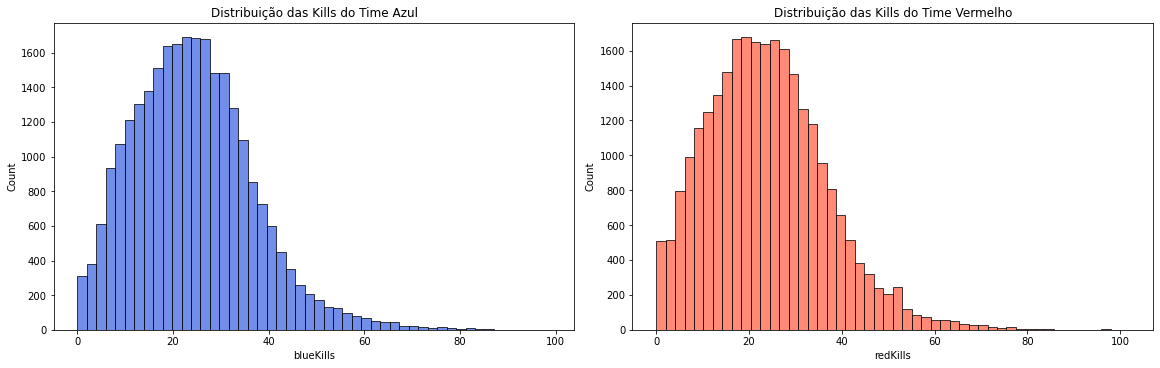

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5),constrained_layout=True)

blue_kills = matches.blueKills
red_kills = matches.redKills

sns.histplot(blue_kills, bins=50, ax=axes[0], color='royalblue');
sns.histplot(red_kills, bins=50, ax=axes[1], color='tomato');

axes[0].set_title('Distribuição das Kills do Time Azul')
axes[1].set_title('Distribuição das Kills do Time Vermelho');

Vemos aqui que muitos dos jogos possuem uma quantidade de Abates por time perto de 20, caracterizando, nesse caso em específico, uma curva de sino que aumenta perto do número de Abates igual a 20. A quantidade de jogos com menos Abates que isso vai diminuindo e a quantidade de jogos com mais Abates também.

### Análise da Progressão do Nível

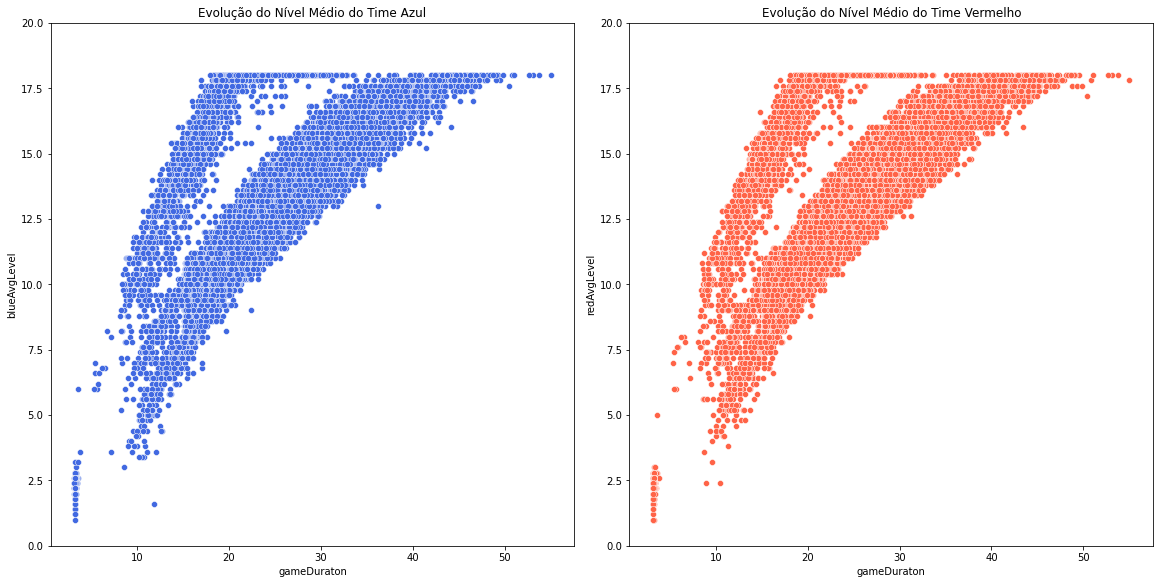

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8),constrained_layout=True)

avg_level_blue = matches.blueAvgLevel
avg_level_red = matches.redAvgLevel
sns.scatterplot(x=game_duration, y=avg_level_blue, ax=axes[0], color='royalblue');
sns.scatterplot(x=game_duration, y=avg_level_red, ax=axes[1], color='tomato');

axes[0].set_title('Evolução do Nível Médio do Time Azul')
axes[0].set_ylim(0, 20)
axes[1].set_title('Evolução do Nível Médio do Time Vermelho');
axes[1].set_ylim(0, 20);

De início, vale notar que existe um limite superior de Nível que é 18; jogos  só permitem o jogador chegar ao máximo neste nível.

*Mas e para chegar lá?*

Temos então aqui casos curiosos, pois existe mais de uma tendência mostrada no gráfico.

Uma delas, a que representa jogadores subindo de Nível em Durações de Jogo menores, nos permite ver que a progressão de Níveis pode acontecer de forma linear.

Já a outra apresenta uma progressão de Nível mais rápida para cada Duração de Jogo; conforme o tempo de jogo aumenta, os jogadores aumentam de nível de forma cada vez mais rápida.

*E porque isso é importante?*

Sabendo que a segunda tendência explicitada caracteriza uma quantidade maior dos jogos analisados pela quantidade de amostras, vemos que é mais comum jogadores pegarem vantagens de Nível e a aproveitarem para conseguir mais níveis ainda: existe um efeito bola de neve comum quando um time começa a pegar níveis, apesar de existir a possibilidade de um crescimento linear.

### Porcentagem das Primeiras Grandes Conquistas da Partida

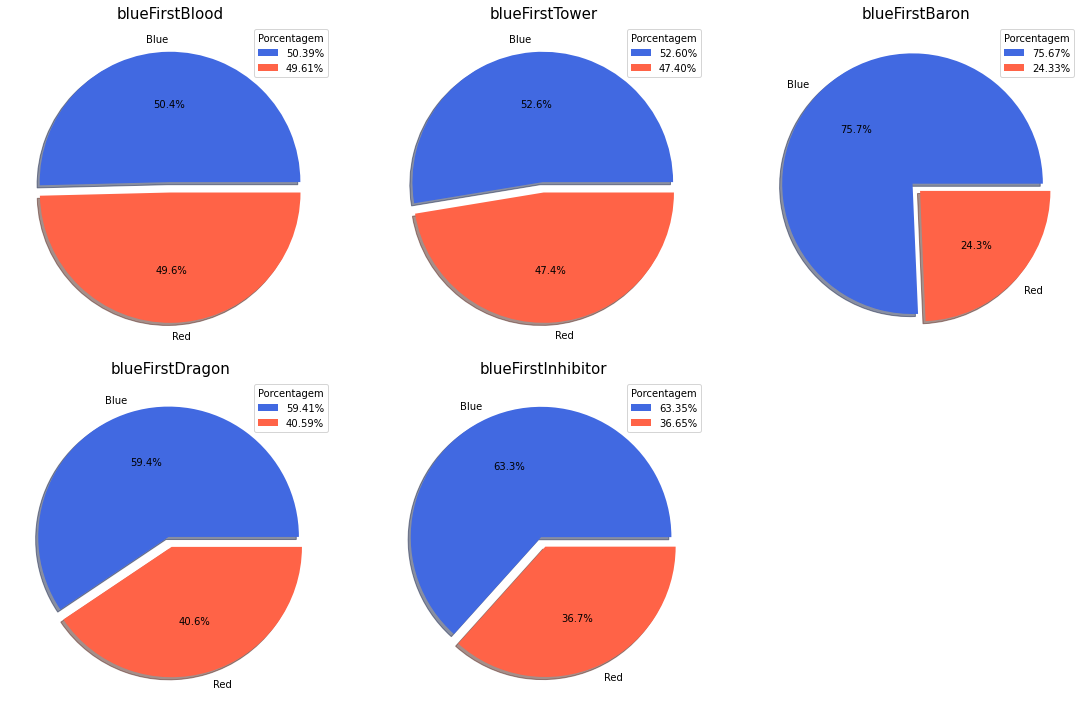

In [40]:
def pie_draw(df):
    fig = plt.figure(figsize=(16, 10))
    colunas = ['blueFirstBlood', 'blueFirstTower', 'blueFirstBaron', 'blueFirstDragon', 'blueFirstInhibitor']
    for i, col in enumerate(colunas):
        axes = fig.add_subplot(2, 3, i+1)
        label = [f"{pc*100:.2f}%" for pc in df[col].value_counts(normalize=True)]
        axes.pie(df[col].value_counts(normalize=True), labels=['Blue', 'Red'], colors=['royalblue', 'tomato'], shadow=True, autopct='%1.1f%%', explode=([0.04]*2));
        axes.legend(title='Porcentagem', labels=[label[0], label[1]])
        axes.set_title(col, size=15)
        plt.tight_layout()

pie_draw(matches)

Tendo em mente a análise das primeiras conquistas do jogo, podemos ver claramente que existe uma tendência por parte de um dos times de conseguir tais conquistas citadas.

O primeiro Abate (FirstBlood) e a primeira Torre Destruída são conquistados por cada time 50% das vezes para cada, ou seja, normalmente não é atribuir uma vantagem inerente para cada time.

Então, partindo para as outras três conquistas, podemos ver elas tratam-se objetivos claros para condições de vitória. O time Azul tem vantagem em conquistar objetivos neutros espalhados pelo mapa e, com isso, conseguem mais facilmente transicionar essa vantagem para a destruição de Inibidores.

*E o que isso implica para o time Vermelho?*

O time Vermelho naturalmente tem uma desvantagem para conquistar esses objetivos neutros, portanto devem ao máximo focar em obter vantagens de outras formas, como Abates, para então diminuírem as vantagens do time Azul e a chance deles conquistarem estes objetivos.

Em relação a quem ganha, vemos que os times do lado Azul que focam em obter os Dragões e Barões tem mais chances de vencer que times do lado Vermelho. Assim, a característica de primeiro Dragão e Barão favorece o time Azul.

### Influência do Jungle na Aquisição de Objetivos Neutros

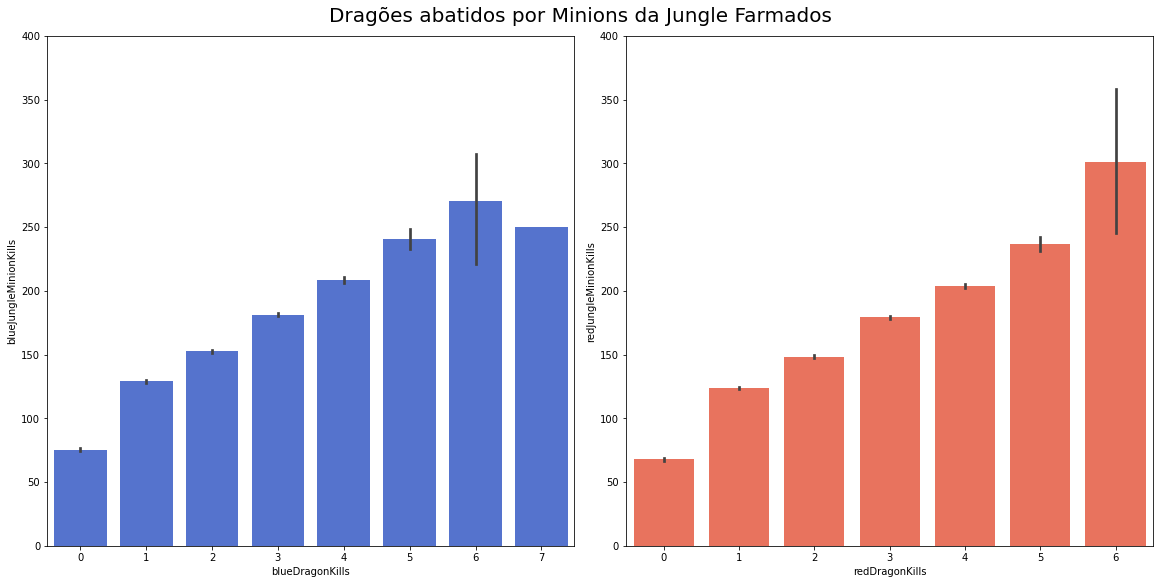

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8),constrained_layout=True)

blue_jg = matches.blueJungleMinionKills
blue_drag = matches.blueDragonKills
red_jg = matches.redJungleMinionKills
red_drag = matches.redDragonKills

sns.barplot(x=blue_drag, y=blue_jg, color='royalblue', ax=axes[0])
sns.barplot(x=red_drag, y=red_jg, color='tomato', ax=axes[1])
fig.suptitle('Dragões abatidos por Minions da Jungle Farmados', size=20);
axes[0].set_ylim(0,400);
axes[1].set_ylim(0,400);

Pelos gráficos acima, vemos uma tendência a ter mais Dragões abatidos quanto mais minions da selva também são abatidos. Isso faz sentido pois quanto mais tempo de duração um jogo tem, mais oportunidade de continuar abatendo minions da selva e mais Dragões renascem. É interessante notar, entretanto, o crescimento da quantidade de minions da selva conforme cada marco de Dragão abatido: vemos que os jogadores desse nível mantêm uma progressão consistente de abate desses minions.

Podemos ver também alguns casos especiais, como o intervalo entre o sexto e o sétimo Dragão abatido pelo time Azul, onde temos uma queda no número de minions da selva abatidos, representando um certo desenteresse nestes ou foco maior no abate do Dragão. Considerando qualquer um destes casos, temos que, pela lógica do jogo, isso faz sentido, pois a cada quatro Dragões abatidos por uma equipe, ela recebe um bônus grande, justificando o interesse das equipes em garantir esse bônus ou impedir a equipe adversária de tê-lo.

Já o intervalo do quinto Dragão para o sexto da equipe Vermelha indica um foco maior no abate de minions da selva para conseguir mais Ouro e ter chances maiores de garantir o Dragão no final do jogo; isso mostra estratégias diferentes sendo utilizadas por cada equipe, inconscientemente ou não.